In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.make_interval_blobs(n_samples=30, n_clusters=4, n_dims = 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         -2.509714        -2.409714         4.860907         7.215447   
1         -0.878199        -0.100255        -7.633062        -7.258796   
2         -2.856550        -1.339060        -9.050459        -8.112181   
3         -1.866458        -0.532597       -11.732818        -9.497817   
4         -7.776030        -7.120446        -7.466280        -3.255340   
5        -11.119522       -10.125969        -5.607328        -3.993886   
6         -4.250034        -2.928771         5.915373         8.158179   
7         -3.252418        -2.307398         6.339873        10.256598   
8         -6.228124        -6.128124        -6.450035        -3.345436   
9         -3.326644        -1.651092        -9.951100        -9.545020   
10        -2.420380        -2.320380         6.898755        11.083

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.00000000e+00 0.00000000e+00 2.19660929e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.06109842e-01 3.84706115e-01
  0.00000000e+00 1.98939365e-02 3.00959719e-01 3.14128651e-02
  0.00000000e+00 1.04847267e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.86251781e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.50878238e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 5.46049084e-02 2.23239614e-01
  9.00700441e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.71085546e-02 1.11691075e-01 0.00000000e+00 0.00000000e+00
  1.57597018e-01 1.93313011e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.33758723e-01
  1.82148844e-02 0.00000000e+00 8.60956824e-02 2.96859714e-01
  0.00000000e+00 1.56050579e-01 9.69068257e-02 0.00000000e+00
  0.00000000e+00 3.16750970e-01]
 [2.19660929e-02 5.46049084e-02 1.00000000e+00 1.37662864e-01
 

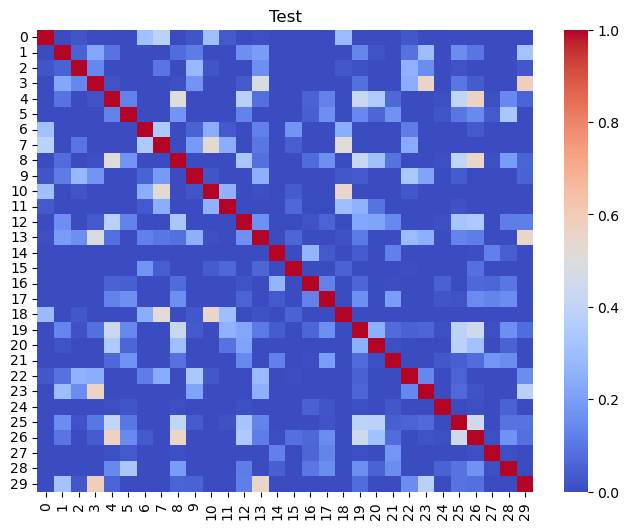

In [3]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [4]:
model = IntervalKMeans(n_clusters=4,max_iter=100,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())
print(model.labels_)

hmodel = IntervalAgglomerativeClustering(n_clusters=4, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[1 2 2 2 3 0 1 1 3 2 1 1 3 2 0 1 0 0 1 3 3 0 2 2 0 3 3 0 0 2]
[0 1 1 1 2 3 0 0 2 1 0 0 2 1 3 0 3 3 0 2 2 3 1 1 3 2 2 3 3 1]
{'linkage_matrix': array([[10.        , 18.        ,  1.18306234,  2.        ],
       [ 3.        , 29.        ,  1.18526609,  2.        ],
       [14.        , 16.        ,  1.27150852,  2.        ],
       [24.        , 27.        ,  1.35847922,  2.        ],
       [ 7.        , 30.        ,  1.37596314,  3.        ],
       [17.        , 33.        ,  1.66959296,  3.        ],
       [ 2.        , 22.        ,  1.8083902 ,  2.        ],
       [ 8.        , 25.        ,  1.96573596,  2.        ],
       [23.        , 31.        ,  2.07082736,  3.        ],
       [ 9.        , 36.        ,  2.24932018,  3.        ],
       [21.        , 32.        ,  2.41462362,  3.        ],
       [ 0.        ,  6.        ,  2.41840742,  2.        ],
       [19.        , 26.        ,  2.57573371,  2.        ],
       [ 4.        , 37.        ,  2.80178146,  3.        ],
   

Requested clusters: 5, Actual clusters: 5


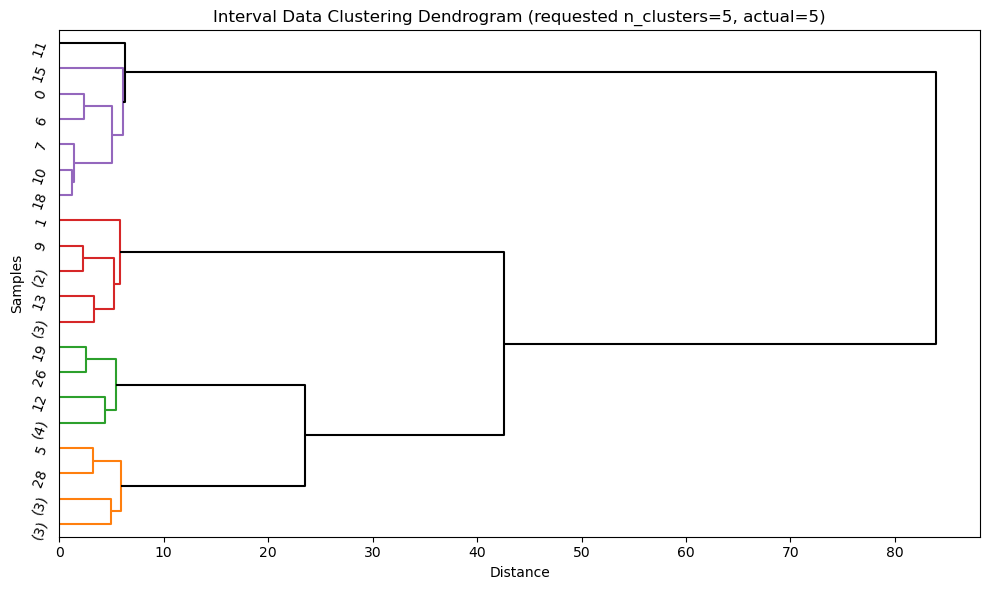

In [5]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='right',
    show_leaf_counts=True
)

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Parallel Coordinates'}>)

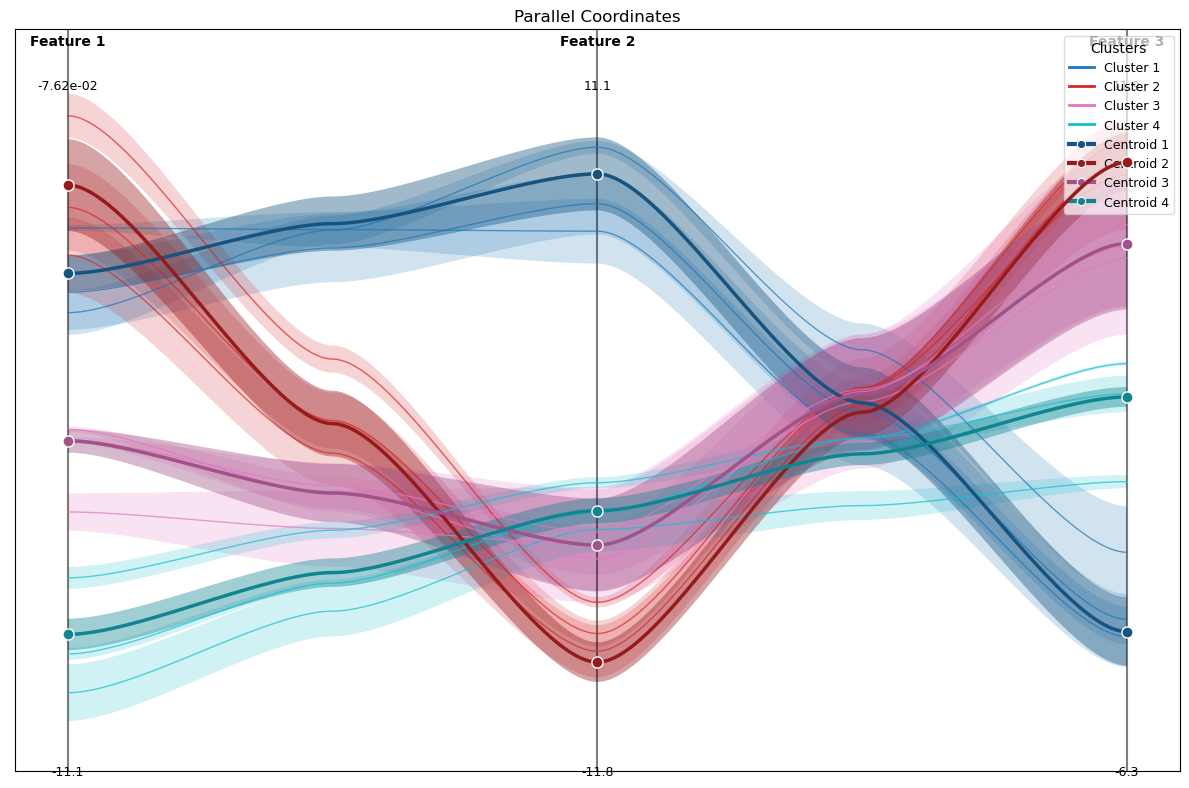

In [ ]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_, 
                                      alpha=0.25,
                                      beta = 0,
                                      use_bundling= True)


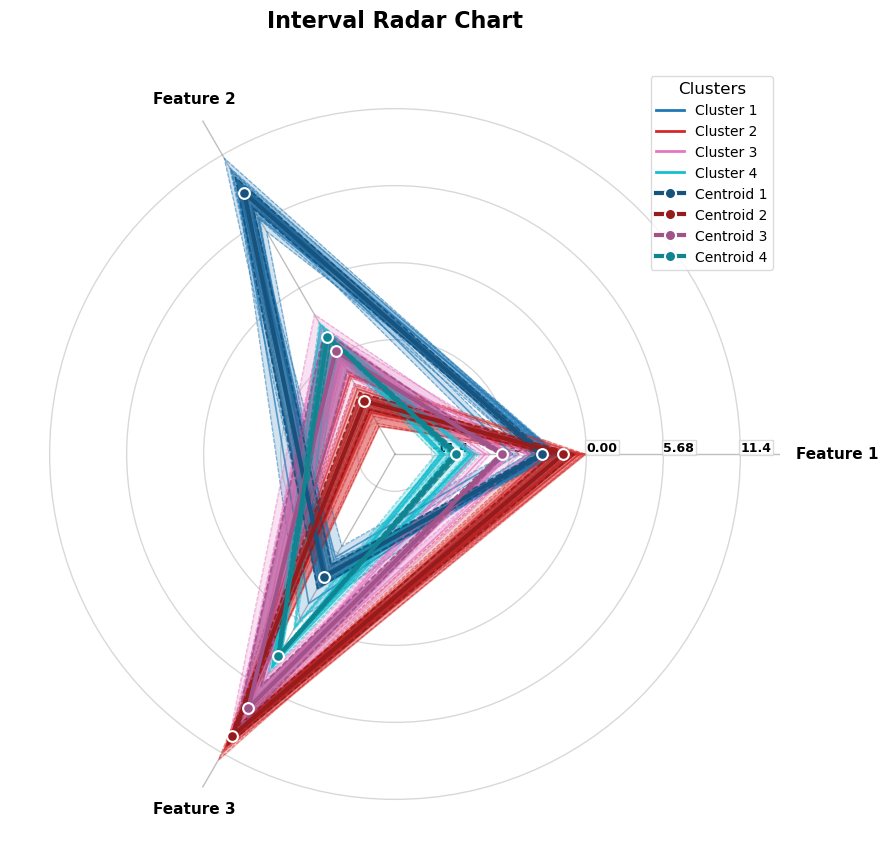

In [7]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_, 
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

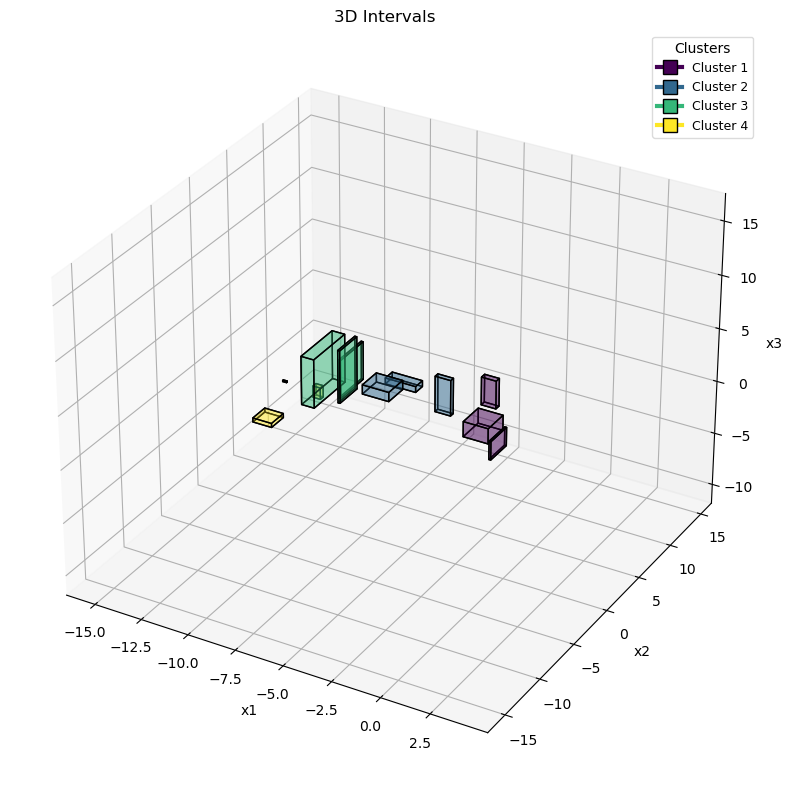

In [ ]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = hmodel.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         -2.509714        -2.409714         4.860907         7.215447   
1         -0.878199        -0.100255        -7.633062        -7.258796   
2         -2.856550        -1.339060        -9.050459        -8.112181   
3         -1.866458        -0.532597       -11.732818        -9.497817   
4         -7.776030        -7.120446        -7.466280        -3.255340   
5        -11.119522       -10.125969        -5.607328        -3.993886   
6         -4.250034        -2.928771         5.915373         8.158179   
7         -3.252418        -2.307398         6.339873        10.256598   
8         -6.228124        -6.128124        -6.450035        -3.345436   
9         -3.326644        -1.651092        -9.951100        -9.545020   
10        -2.420380        -2.320380         6.898755        11.083787   
11        -5.993409        -5.010359         7.753654        10.150510   
12        -8.2

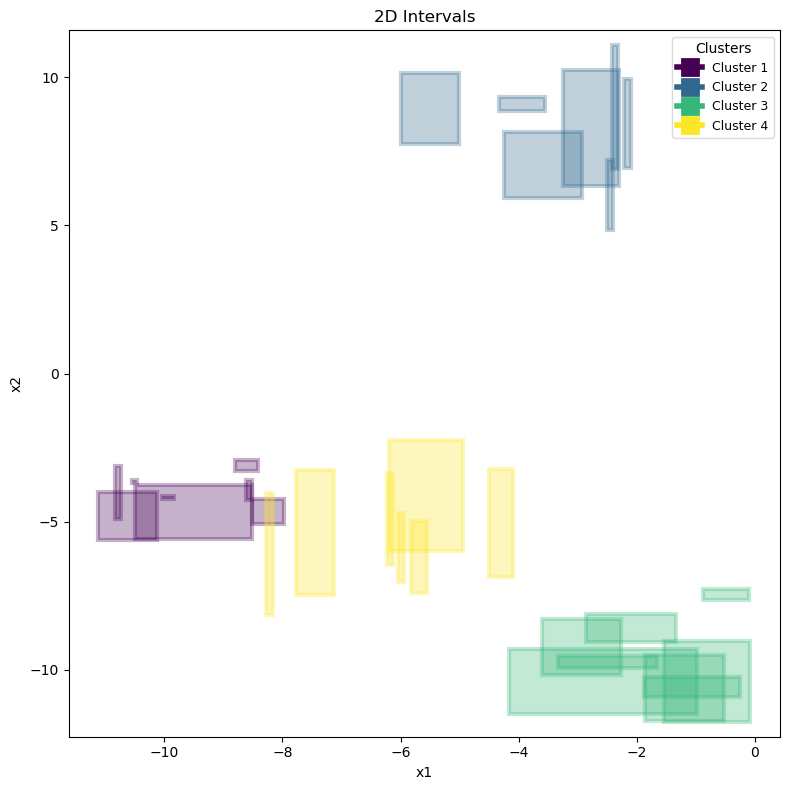

In [9]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

fig, ax = Interval2d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_, fill_intervals=True)